In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
#read train and test files
train_file = pd.read_csv('https://raw.githubusercontent.com/vneogi199/Handwritten-Digit-Recognition-Using-Random-Forest/master/train.csv')
test_file = pd.read_csv('https://raw.githubusercontent.com/vneogi199/Handwritten-Digit-Recognition-Using-Random-Forest/master/test.csv')

In [4]:
#view first 5 records of train_file
train_file.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#view first 5 records of test_file
test_file.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#list of all digits that are going to be predicted
np.sort(train_file.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [7]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)

In [8]:
num_train,num_validation

(33600, 8400)

In [9]:
#generate training data from train_file
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [10]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


# Visualize Training Data

Label: 5


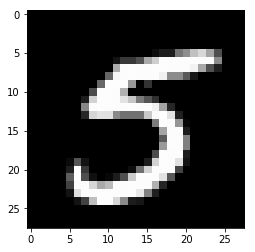

In [12]:
index=3445
print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [13]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

C:\Users\sai pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [15]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9364285714285714


In [16]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[836   0   1   1   0   2   6   0   6   0]
 [  0 935   4   5   1   1   1   1   1   1]
 [  8   3 753   7   5   5   3   5   9   3]
 [  2   3  27 796   2  28   2   8  12   2]
 [  1   7   3   3 762   2   7   1   3  22]
 [  6   2   5  35   5 671   5   2   9   7]
 [  7   3   2   0   4   7 802   0   6   0]
 [  3   2  11   3   6   4   0 843   3   9]
 [  6   9   8  12   9  11  13   3 725   6]
 [ 10   4   4  12  27  11   2  18   9 743]]


# View wrong predictions

Predicted 5 as 3


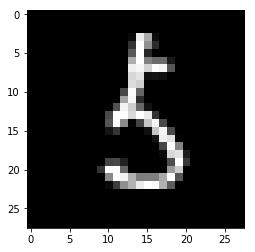

In [17]:
index=54
print("Predicted " + str(y_validation[y_validation!=prediction_validation][index]) + " as " + 
     str(prediction_validation[y_validation!=prediction_validation][index]))
plt.imshow(x_validation[y_validation!=prediction_validation][index].reshape((28,28)),cmap='gray')

In [18]:
x_test=test_file

In [19]:
#predict test data
prediction_test = clf.predict(x_test)

# View predictions for Test data

Predicted 1


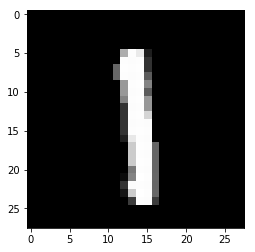

In [20]:
index=567
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap='gray')
plt.show()